# Check and analysis gojek app sentimen

In [161]:
#dataFrame
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#NLTK
import nltk
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
#stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Word2vec
import gensim

#helper
from collections import Counter
import emoji
import re


In [162]:
#read dataset
df = pd.read_csv("datagojekcopy.csv")
print(df.shape)

(20000, 4)


In [163]:
df.head(50)

,userName,score,at,content
0,Robbi Eko,5,2023-03-30 14:37:38,sip... terima kasih 🙏
1,mimi cedar,5,2023-03-30 14:35:59,Bagaimana cara transfer sesama Gopay. Gopay sa...
2,Elisabeth Kiswati Ladiyo,5,2023-03-30 14:33:41,"Aman,dan cepat. Sesuai dengan ekspektasi.👍🏼👍🏼"
3,Jemmi Meliau ibanez,5,2023-03-30 14:23:25,. aplikasi yang cukup membantu
4,Boedi Arsih,5,2023-03-30 14:19:13,Cepet sampainya
5,Nabila Nayla,5,2023-03-30 14:17:12,yihaw
6,Irsya chanel,5,2023-03-30 14:15:20,bagus
7,Sunar tiee,2,2023-03-30 13:55:29,Kalou di perdalam susah dapetnya
8,Irwan Sulaeman,5,2023-03-30 13:50:32,baik sekali
9,EKA WAHYU WIDIYANTO,1,2023-03-30 13:47:43,saya top up gopay dengan nomer akun saya yang ...


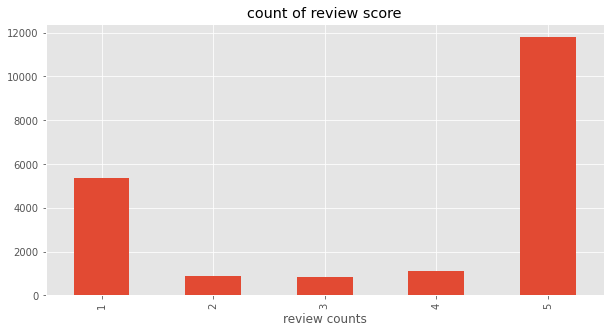

In [164]:
ax =df['score'].value_counts().sort_index().plot(
        kind = 'bar',
        title = 'count of review score',
        figsize = (10,5))
ax.set_xlabel("review counts")
plt.show()

# Preprocessing text
- menghilangkan emoji
- menghilangkan symbol
- stemmer
- word_stops

In [165]:
#Prepare preprocessing text
COBA = '\.'
TEXT_CLEANING_RE = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'
stop_words = set(stopwords.words("indonesian"))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [166]:
for word in sorted(stop_words):
    print(word)

ada
adalah
adanya
adapun
agak
agaknya
agar
akan
akankah
akhir
akhiri
akhirnya
aku
akulah
amat
amatlah
anda
andalah
antar
antara
antaranya
apa
apaan
apabila
apakah
apalagi
apatah
artinya
asal
asalkan
atas
atau
ataukah
ataupun
awal
awalnya
bagai
bagaikan
bagaimana
bagaimanakah
bagaimanapun
bagi
bagian
bahkan
bahwa
bahwasanya
baik
bakal
bakalan
balik
banyak
bapak
baru
bawah
beberapa
begini
beginian
beginikah
beginilah
begitu
begitukah
begitulah
begitupun
bekerja
belakang
belakangan
belum
belumlah
benar
benarkah
benarlah
berada
berakhir
berakhirlah
berakhirnya
berapa
berapakah
berapalah
berapapun
berarti
berawal
berbagai
berdatangan
beri
berikan
berikut
berikutnya
berjumlah
berkali-kali
berkata
berkehendak
berkeinginan
berkenaan
berlainan
berlalu
berlangsung
berlebihan
bermacam
bermacam-macam
bermaksud
bermula
bersama
bersama-sama
bersiap
bersiap-siap
bertanya
bertanya-tanya
berturut
berturut-turut
bertutur
berujar
berupa
besar
betul
betulkah
biasa
biasanya
bila
bilakah
bisa
bisakah
boleh


In [167]:
# Remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # simbol & piktograf
                               u"\U0001F680-\U0001F6FF"  # transport & simbol peta
                               u"\U0001F1E0-\U0001F1FF"  # bendera (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub('',text)

In [168]:
text = df['content'].loc[0]
print(remove_emoji(text))

sip... terima kasih 


In [169]:
# remove all emoji
def remove_all(text):
    sentence = remove_emoji(text)
    return sentence
    

In [170]:
df.content = df.content.apply(lambda x:remove_all(x))

In [171]:
df.head(50)

,userName,score,at,content
0,Robbi Eko,5,2023-03-30 14:37:38,sip... terima kasih
1,mimi cedar,5,2023-03-30 14:35:59,Bagaimana cara transfer sesama Gopay. Gopay sa...
2,Elisabeth Kiswati Ladiyo,5,2023-03-30 14:33:41,"Aman,dan cepat. Sesuai dengan ekspektasi."
3,Jemmi Meliau ibanez,5,2023-03-30 14:23:25,. aplikasi yang cukup membantu
4,Boedi Arsih,5,2023-03-30 14:19:13,Cepet sampainya
5,Nabila Nayla,5,2023-03-30 14:17:12,yihaw
6,Irsya chanel,5,2023-03-30 14:15:20,bagus
7,Sunar tiee,2,2023-03-30 13:55:29,Kalou di perdalam susah dapetnya
8,Irwan Sulaeman,5,2023-03-30 13:50:32,baik sekali
9,EKA WAHYU WIDIYANTO,1,2023-03-30 13:47:43,saya top up gopay dengan nomer akun saya yang ...


In [172]:
#drop null content
for x in df.index:
    if df.loc[x,'content'] == "":
        df.drop(x, inplace = True)
df.shape

(19722, 4)

In [173]:
#menghilangkan symbol
def remove_symbol(text):
    text = re.sub(COBA,'',str(text).strip())
    return text

In [174]:
#menghilangkan symbol
def remove_symbol_clean(text):
    text = re.sub(TEXT_CLEANING_RE,' ',str(text).lower().strip())
    return text

In [175]:
text = "sip... terima kasih"
print(remove_symbol(text))

sip terima kasih


In [176]:
#stopwords
def stopWordsData(text, stem = False):
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

# Cleaning singkatan kata

In [177]:
#read_dataset singkatan (data didapat dari scrapping data)
df_singkatan_scrap = pd.read_csv("singkatan_1_kata.csv")
df_singkatan_scrap.head()

,Singkatan,Kata
0,7an,tujuan
1,@,di
2,ababil,abg labil
3,abis,habis
4,acc,accord


In [178]:
#pindahkan ke dictionary
singkatan_dict_scrap = dict(zip(df_singkatan_scrap['Singkatan'], df_singkatan_scrap['Kata']))
df_singkatan_scrap.shape

(1481, 2)

In [179]:
#Membuat function mengubah singkatan dari bahasa indonesia
singkatan = {
    #a
    "apaa": "apa",
    "apaaa": "apa",
    "apaaaa": "apa",
    #b
    "bsa": "bisa",
    "byk": "banyak",
    #c
    #d
    "dowload": "download",
    "da": "ada",
    "dll": "dan lain-lain",
    "d": "di",
    #e
    "elu": "kamu",
    #f
    #g
    "gbisa": "gak bisa",
    "gagu": "gak guna",
    "g": "gak",
    "gk": "gak",
    "gohek": "gojek",
    "goek": "gojek",
    #h
    #i
    #j
    #k
    "knp": "kenapa",
    #l
    "loding":"loading",
    "lg": "lagi",
    "li": "beli",
    "lu": "kamu",
    #m
    "mantaap" : "mantap",
    "mantapp": "mantap",
    "mantaf": "mantap",
    #n
    "n": "dan",
    #o
    #p
    "pedning": "pending",
    #q
    #r
    #s
    "sp": "siapa",
    "sdh": "sudah",
    #t
    "tp": "tapi",
    "trs": "terus",
    "trims": "terima kasih",
    #u
    "u": "kamu",
    "udh": "udah",
    #v
    #w
    #x
    #y
    "yg": "yang",
    "sy": "saya",
    "y": "iya"
    #z
    
}

df_singkatan = pd.DataFrame(list(singkatan.items()),columns = ['singkatan','kata'])
singkatan_dict = dict(zip(df_singkatan['singkatan'], df_singkatan['kata']))

def changeAbbreviation_DF(text):
    words = text.split()
    new_words = [singkatan_dict[word] if word in singkatan_dict else word for word in words]
    return " ".join(new_words)

def changeAbbreviation_DF_scrap(text):
    words = text.split()
    new_words =[singkatan_dict_scrap[word] if word in singkatan_dict_scrap else word for word in words]
    return " ".join(new_words)

def changeAbbreviation(text):
    words = text.split()
    
    for i in range(len(words)):
        if words[i] in df_singkatan['singkatan']:
            words[i] = df_singkatan['kata',[words[i]]]
    return " ".join(words)

In [180]:
#remove symbol tandak titik .
df.content = df.content.apply(lambda x: remove_symbol(x))

In [181]:
#normalisasi mengubah singkatan
df.content = df.content.apply(lambda x: changeAbbreviation_DF(x))

In [182]:
text = df.loc[33,'content']
print(text)

pas di gunakan untuk pembayaran gak bisa di gunakan padahal udah gak bawa uang lagi dana ada di gopay menjengkelkan buang waktu malu maluin aja payah


In [183]:
text = df.loc[33,'content']
print(text)

pas di gunakan untuk pembayaran gak bisa di gunakan padahal udah gak bawa uang lagi dana ada di gopay menjengkelkan buang waktu malu maluin aja payah


In [184]:
text = df.loc[45,'content']
print(text)

Tiba" akun hrs upgrade ke gopplus padahal saya pengguna dr tahun 2016 dan smua transaksi berantakan


In [185]:
#normalisasi mengubah singkatan
df.content = df.content.apply(lambda x: changeAbbreviation_DF_scrap(x))

In [186]:
text = df.loc[45,'content']
print(text)

Tiba" akun harus              upgrade ke gopplus padahal saya pengguna dari              tahun 2016 dan semua              transaksi berantakan


In [187]:
#hapus symbol
df.content = df.content.apply(lambda x: remove_symbol_clean(x))

In [188]:
text = df.loc[45,'content']
print(text)

tiba akun harus upgrade ke gopplus padahal saya pengguna dari tahun 2016 dan semua transaksi berantakan


In [189]:
#Function Merger preprocessing_text

def preprocessing_text(text):
    content = text
    content = remove_symbol(content)
    content = changeAbbreviation_DF(content)
    content = stopWordsData(content)
    
    return content
    
    

## Buat new_df untuk Membuat similiar untuk proses normalisasi

In [190]:
new_df = df.reset_index(drop = True)
new_df.head()

,userName,score,at,content
0,Robbi Eko,5,2023-03-30 14:37:38,ok terima kasih
1,mimi cedar,5,2023-03-30 14:35:59,bagaimana cara transfer sesama gopay gopay say...
2,Elisabeth Kiswati Ladiyo,5,2023-03-30 14:33:41,aman dan cepat sesuai dengan ekspektasi
3,Jemmi Meliau ibanez,5,2023-03-30 14:23:25,aplikasi yang cukup membantu
4,Boedi Arsih,5,2023-03-30 14:19:13,cepet sampainya


In [191]:
new_df.content = new_df.content.apply(lambda x: preprocessing_text(x))

In [192]:
new_df.head()

,userName,score,at,content
0,Robbi Eko,5,2023-03-30 14:37:38,ok terima kasih
1,mimi cedar,5,2023-03-30 14:35:59,transfer gopay gopay transfer gopay
2,Elisabeth Kiswati Ladiyo,5,2023-03-30 14:33:41,aman cepat sesuai ekspektasi
3,Jemmi Meliau ibanez,5,2023-03-30 14:23:25,aplikasi membantu
4,Boedi Arsih,5,2023-03-30 14:19:13,cepet sampainya


In [193]:
#Prepare

#DATASET
TRAIN_SIZE = 0.8

# WORD2VEC 
W2V_SIZE = 100
W2V_WINDOW = 10
W2V_EPOCH = 32
W2V_MIN_COUNT = 5

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [194]:
#Split DF
df_train, df_test = train_test_split(new_df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 15777
TEST size: 3945


## Word2vec

In [195]:
%%time
documents = [_content.split() for _content in df_train.content]

CPU times: total: 15.6 ms
Wall time: 16 ms


In [196]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [197]:
print(w2v_model)

Word2Vec<vocab=0, vector_size=100, alpha=0.025>


In [198]:
w2v_model.build_vocab(documents)

In [199]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 2059


In [200]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: total: 5.56 s
Wall time: 1.96 s


(1938345, 2909888)

In [201]:
w2v_model.wv.most_similar("mantap")

[('jiwa', 0.862605631351471),
 ('ekonomis', 0.8350052833557129),
 ('pertahankan', 0.8319317102432251),
 ('alhamdulillah', 0.8164352178573608),
 ('ok', 0.808943510055542),
 ('mantul', 0.8009737133979797),
 ('siip', 0.7914288640022278),
 ('pokoknya', 0.7881687879562378),
 ('sngt', 0.7821798920631409),
 ('tq', 0.7790216207504272)]

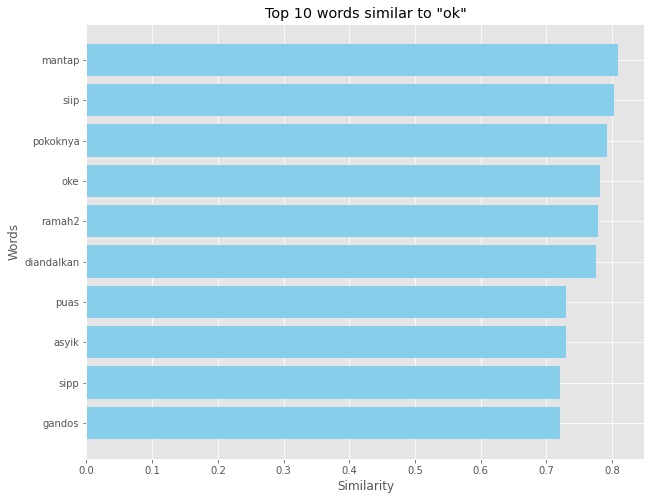

In [202]:
# Ambil 10 kata yang paling mirip dengan 'ok' dan tingkat kesamaannya
similar_words = w2v_model.wv.most_similar('ok', topn=10)
words = [item[0] for item in similar_words]
similarities = [item[1] for item in similar_words]

# Buat bar chart
plt.figure(figsize=(10,8))
plt.barh(words, similarities, color='skyblue')
plt.xlabel('Similarity')
plt.ylabel('Words')
plt.title('Top 10 words similar to "ok"')
plt.gca().invert_yaxis()  # Urutkan dari yang paling mirip di atas
plt.show()

In [203]:
sampleN = df['content'].loc[12]
sampleP = df['content'].loc[33]

In [204]:
print(sampleP) #with score 5
print("-------------")
print(sampleN) #with score 1

pas di gunakan untuk pembayaran tidak bisa di gunakan padahal sudah tidak bawa uang lagi dana ada di gopay menjengkelkan buang waktu malu maluin saja payah
-------------
tolong iya admin di training lagi supir goride nya saya sudah mengalami kekecewaan dua kali yang pertama supir tidak hati hati di jalan macet dia nyalip tapi tidak pakai perhitungan sampai kaki saya kebentur tiang telepon dan kenalpot motor orang lain di jalan dan yang kedua supir ngeyel padahal dia yang salah tapi tidak mau mengaku salah bahkan pergi tiba tiba saat saya sedang bicara


# Visualization Vaders

## Tokenizer